# Importar librerias

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Cargar Archivos y labels 2019 y 2020

In [2]:
df_2019 = pd.read_csv('data/traslados_2019_tp2_3_lima.csv')
df_2019

,COD_MOD,COD_MOD_DESTINO,WEIGHT
0,1038199,411504,1
1,503052,411504,1
2,826263,416057,2
3,1053818,411736,1
4,482042,411736,1
...,...,...,...
178899,328955,281972,1
178900,1531367,679472,1
178901,286427,1064120,1
178902,743716,636837,2


In [3]:
df_2020 = pd.read_csv('data/traslados_2020_tp2_3_lima.csv')
df_2020

,COD_MOD,COD_MOD_DESTINO,WEIGHT
0,900993,416073,1
1,1010354,417758,1
2,649731,577346,1
3,1521236,577346,1
4,436162,412635,1
...,...,...,...
204313,332247,1342724,1
204314,320408,1342724,1
204315,826354,1342724,1
204316,1501709,1342724,1


In [4]:
df_labels = pd.read_csv('data/traslados_ie_labels_2.csv', encoding='Windows-1252', usecols=lambda col: col != 13)
df_labels

C:\Users\AlexanderCF\AppData\Local\Temp\ipykernel_18256\1333407298.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labels = pd.read_csv('data/traslados_ie_labels_2.csv', encoding='Windows-1252', usecols=lambda col: col != 13)


,COD_MOD,ANEXO,D_DPTO,D_PROV,D_DIST,D_REGION,D_DREUGEL,GESTION,D_NIV_MOD,NOMBRE_IE,NLONG_IE,NLAT_IE
0,415547,0,ANCASH,HUARAZ,INDEPENDENCIA,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,123,-77.531910,-9.51885
1,415638,0,ANCASH,HUARAZ,HUARAZ,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,122,-77.531960,-9.53067
2,415646,0,ANCASH,HUARAZ,HUARAZ,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,233,-77.522700,-9.5311
3,415877,0,ANCASH,HUARAZ,INDEPENDENCIA,DRE ANCASH,UGEL HUARAZ,PRIVADO,Inicial - Jardín,COLEGIO PARROQUIAL NUESTRA SEÑORA DEL SAGRADO ...,-77.531481,-9.516673
4,567206,0,ANCASH,HUARAZ,INDEPENDENCIA,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,268,-77.504026,-9.51394
...,...,...,...,...,...,...,...,...,...,...,...,...
173899,1794734,0,CAJAMARCA,CONTUMAZA,CONTUMAZA,DRE CAJAMARCA,UGEL CONTUMAZÁ,PUBLICO,Primaria,211,-78.652450,-7.34258
173900,1794742,0,HUANCAVELICA,HUAYTARA,SAN FRANCISCO DE SANGAYAICO,DRE HUANCAVELICA,UGEL HUAYTARÁ,PUBLICO,Secundaria,22586,-74.971787,-13.59848
173901,3007085,0,AMAZONAS,BAGUA,IMAZA,DRE AMAZONAS,UGEL IBIR-IMAZA,PUBLICO,Inicial - Jardín,451,-78.187444,-4.844992
173902,3007093,0,AMAZONAS,BAGUA,IMAZA,DRE AMAZONAS,UGEL IBIR-IMAZA,PUBLICO,Primaria,17901,-78.367603,-5.111024


# Cear Grafo 2019 y 2020

In [5]:
G1 = nx.Graph()

for i in range(df_2019.shape[0]):
    f = df_2019.iloc[i,:].values
    f = f[~pd.isnull(f)]
    G1.add_edge(f[0], f[1], weight=f[2])

for i in range(df_2020.shape[0]):
    f = df_2020.iloc[i,:].values
    f = f[~pd.isnull(f)]
    G1.add_edge(f[0], f[1], weight=f[2])

In [6]:
print('Cantidad de Colegios:',len(G1.nodes()))
print('Cantidad de Conexiones:',len(G1.edges()))

Cantidad de Colegios: 27583
Cantidad de Conexiones: 307013


# Agregar etiqueta de datos

In [7]:
#dic_colegios = {}
#colegios_existentes = 0
#colegios_no_existentes = 0
for i in range(df_labels.shape[0]):
    f = df_labels.iloc[i,:].values
    f = f[~pd.isnull(f)]
    if G1.has_node(f[0]):
        #if(f[3] == 'LIMA'):
        G1.add_node(f[0], departamento=f[2], provincia=f[3], distrito=f[4], region=f[5], ugel=f[6], gestion=f[7], modalidad=f[8], label=f[9], nombre=f[9], lon=f[10], lat=f[11])
        #else:
        #G1.remove_node(f[0])
        #print('0:', f[0],'1:', f[1],'2:', f[2],'3:', f[3],'4:', f[4],'5:', f[5],'6:', f[6],'7:', f[7],'8:', f[8],'9:', f[9],'10:', f[10])
        #colegios_existentes += 1
    #else:
    #colegios_no_existentes += 1
    #print(f)
    #G1.add_edge(f[0], f[1], weight=f[2])

#print('cantidad de existentes:', colegios_existentes, ', no existentes:', colegios_no_existentes)

# Cargar Librerias cdlib

In [24]:
from cdlib import algorithms
from cdlib import viz
from cdlib import evaluation
from community import community_louvain

In [25]:
#louvain_com = algorithms.louvain(nx.Graph(incoming_graph_data=G1)) #Lo pasamos a un grafo no dirigido
louvain_com = algorithms.louvain(G1)
print(louvain_com)

In [26]:
print('La cantidad de comunidades es {}'.format(len(louvain_com.communities)))
#En un grafo dirigido comunidades sale 14
#En un grafo no dirigido comunidades sale 15
#for c in louvain_com.communities:
#    print(c)

La cantidad de comunidades es 15


In [14]:
from igraph.summary import summary

#Mostrar la modularidad general
print(louvain_com.modularity_density())

#Mostrar la modularidad de cada comunidad:
print(louvain_com.internal_edge_density())
print(louvain_com.internal_edge_density(summary=False)) #Mostrar desglosado

FitnessResult(min=None, max=None, score=80.43313397935505, std=None)
FitnessResult(min=0.0037744205031073003, max=1.0, score=0.18783055584496228, std=0.34085091632006437)
[0.0037744205031073003, 0.005533539399677922, 0.005411236068971367, 0.005307161032351872, 0.0042450284385768255, 0.005492903393639628, 0.006803568162311989, 0.0085251954821894, 0.011511347800458614, 0.012498275624224032, 0.01502232843559183, 0.4, 0.3333333333333333, 1.0, 1.0]


In [ ]:
# exportando grafo
nx.write_graphml(G1, 'out/colegios_2019_2020.graphml')

In [28]:
# Exportar a Guephi
nx.write_gexf(G1, 'out/colegios_2019_2020_alex.gexf')

In [15]:
#calcular los grados de los nodos
d = {}
for x in G1.degree():
    d[x[0]] = x[1]
print(d)

{1038199: 122, 411504: 4, 503052: 231, 826263: 103, 416057: 2, 1053818: 114, 411736: 4, 482042: 97, 285775: 93, 566463: 172, 577627: 1, 588830: 35, 416412: 1, 253732: 92, 416420: 1, 1482066: 54, 577361: 2, 662726: 81, 908384: 3, 1665413: 48, 1483023: 67, 1524909: 68, 1620236: 1, 245670: 143, 336636: 63, 1719855: 60, 628842: 206, 1245604: 85, 1492008: 53, 1486265: 18, 1020866: 45, 663559: 111, 1663491: 56, 833947: 57, 336743: 29, 1199009: 110, 336818: 32, 337311: 65, 1760669: 27, 1073444: 20, 1243955: 52, 677716: 115, 772863: 37, 578245: 33, 1490416: 18, 1234384: 81, 1422666: 150, 1069673: 31, 337766: 58, 1763234: 138, 337717: 70, 314401: 68, 1351428: 178, 1170364: 42, 590315: 36, 1639699: 43, 646141: 44, 1376490: 193, 1198969: 165, 833210: 47, 1498567: 86, 1719848: 88, 584854: 46, 338848: 98, 327809: 43, 332007: 33, 774422: 48, 833459: 26, 1169242: 44, 1391481: 84, 1735273: 117, 1491976: 17, 338822: 129, 314518: 55, 1021526: 24, 325621: 148, 583179: 20, 1170281: 30, 1701002: 161, 33870

In [16]:
#para cada comunidad
for c in louvain_com.communities:
    #calcular el servicio educativo de grado máximo
    max = 0
    s_max = 0
    for s in c: #para cada servicio educativo en la comunidad c
        if max < d[s]:
            max = d[s]
            s_max = s
    #imprimir el resultado para la comunidad c
    print(s_max, '\t', max, '\t', c)

434449 	 497 	 [1038199, 662726, 908384, 1665413, 1483023, 1498567, 1735273, 1483064, 1694413, 432724, 1372648, 1009885, 435305, 662890, 1185768, 1703743, 433227, 1303981, 1703842, 488684, 1496546, 781153, 1087121, 433821, 704312, 1488360, 820803, 436592, 1481456, 1664481, 1247626, 1009927, 883314, 1442508, 1009448, 1499466, 1246792, 528893, 1442565, 1499383, 1556125, 1500198, 828160, 1280809, 1728641, 1482017, 1487545, 1009968, 1482546, 434704, 662734, 1054204, 883223, 436410, 436626, 419556, 764852, 598490, 1572650, 819672, 1492925, 1377605, 436212, 401083, 829291, 516773, 628826, 401109, 781120, 473470, 821082, 434605, 1495720, 1009281, 418491, 211987, 525055, 1538198, 1265107, 854901, 436477, 1494574, 1498054, 1443415, 526053, 732255, 834853, 628701, 1497817, 1185644, 434720, 1538206, 527846, 821371, 614628, 524264, 1435775, 703942, 1760701, 776674, 1375864, 434092, 854661, 1195619, 824516, 1698943, 1327402, 436808, 434324, 434464, 1281682, 1728666, 400036, 322081, 821496, 1545664,

In [ ]:
#Visualizacion de Grafo
viz.plot_network_clusters(G1, louvain_com, node_size=50, figsize=(20,10))
plt.show()

In [ ]:
#vizualizar el grafo según comunidades
pos = nx.spectral_layout(G1)
viz.plot_network_clusters(G1, louvain_com, pos, node_size=50, figsize=(20,10),)
plt.show()

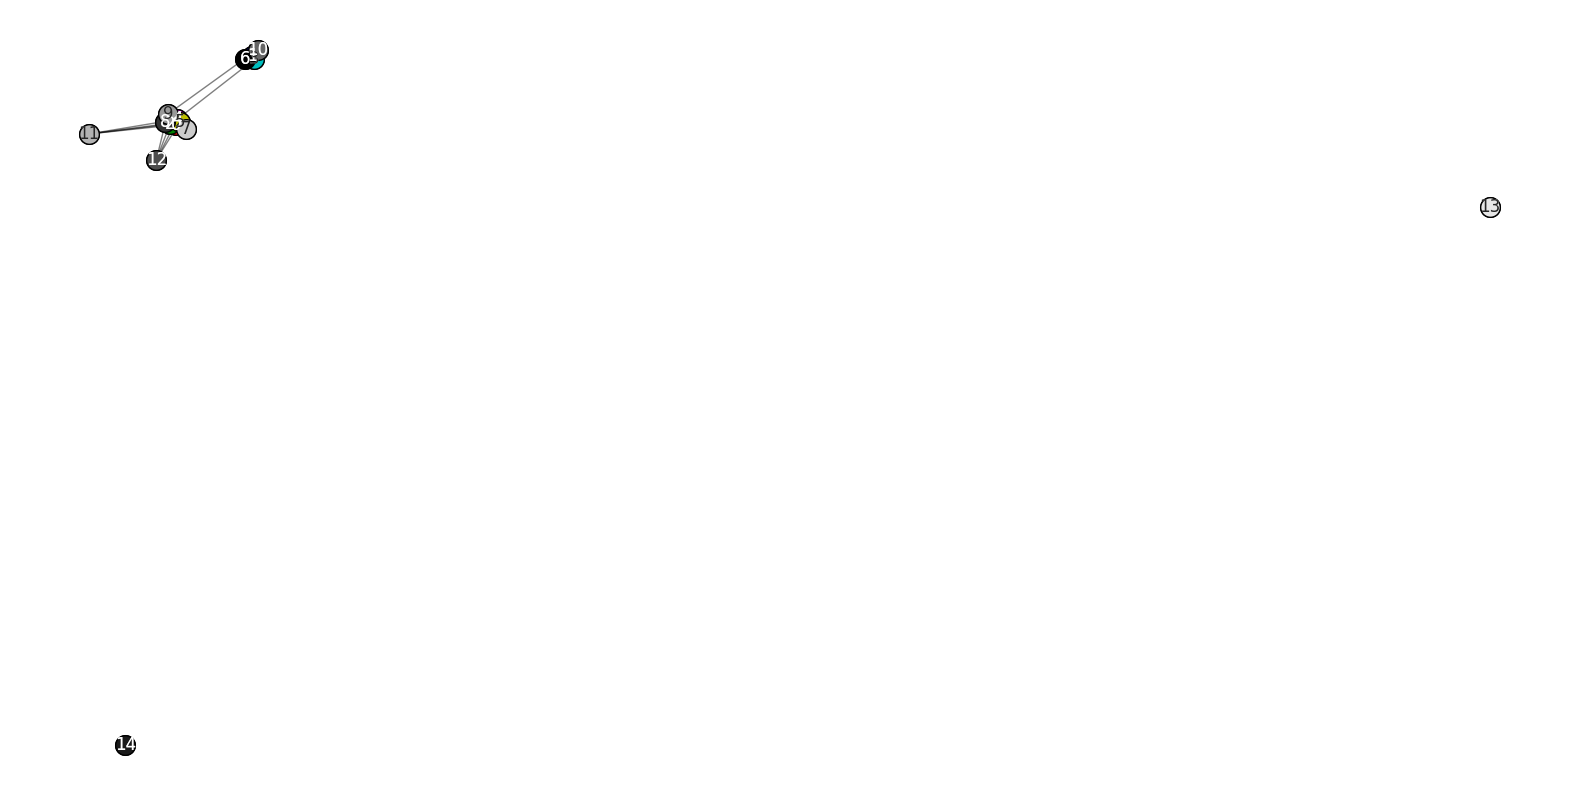

In [17]:
#visualizar el grafo de comunidades
viz.plot_community_graph(G1, louvain_com, figsize=(20,10), plot_labels=True)
plt.show()

5 [1038199, 662726, 908384, 1665413, 1498567, 1735273, 1372648, 662890, 433227, 488684, 1496546, 781153, 1087121, 704312, 1664481, 1247626, 1442508, 1499466, 1442565, 1499383, 1556125, 1500198, 828160, 1280809, 1728641, 434704, 1054204, 436410, 1377605, 401083, 829291, 516773, 781120, 473470, 434605, 1495720, 418491, 211987, 525055, 1538198, 1265107, 1494574, 1498054, 834853, 1497817, 434720, 1538206, 527846, 524264, 1436187, 1760701, 776674, 1195619, 824516, 436808, 434464, 1281682, 1728666, 322081, 1500552, 1666809, 831602, 763292, 1457266, 1667047, 829093, 1442375, 1759752, 765867, 1494475, 1328665, 1377530, 436576, 1037514, 732479, 628172, 1666437, 436436, 1499367, 832014, 1412824, 1629773, 1666858, 1698984, 523563, 776161, 1750363, 1437714, 1763226, 1442441, 516674, 1702182, 831248, 1480128, 1438548, 434415, 1433085, 1762657, 433748, 1556117, 1432798, 1442417, 1662071, 1495522, 1312396, 663690, 1728682, 1194729, 433011, 1346725, 662858, 432880, 1496918, 401448, 1037472, 831313, 62

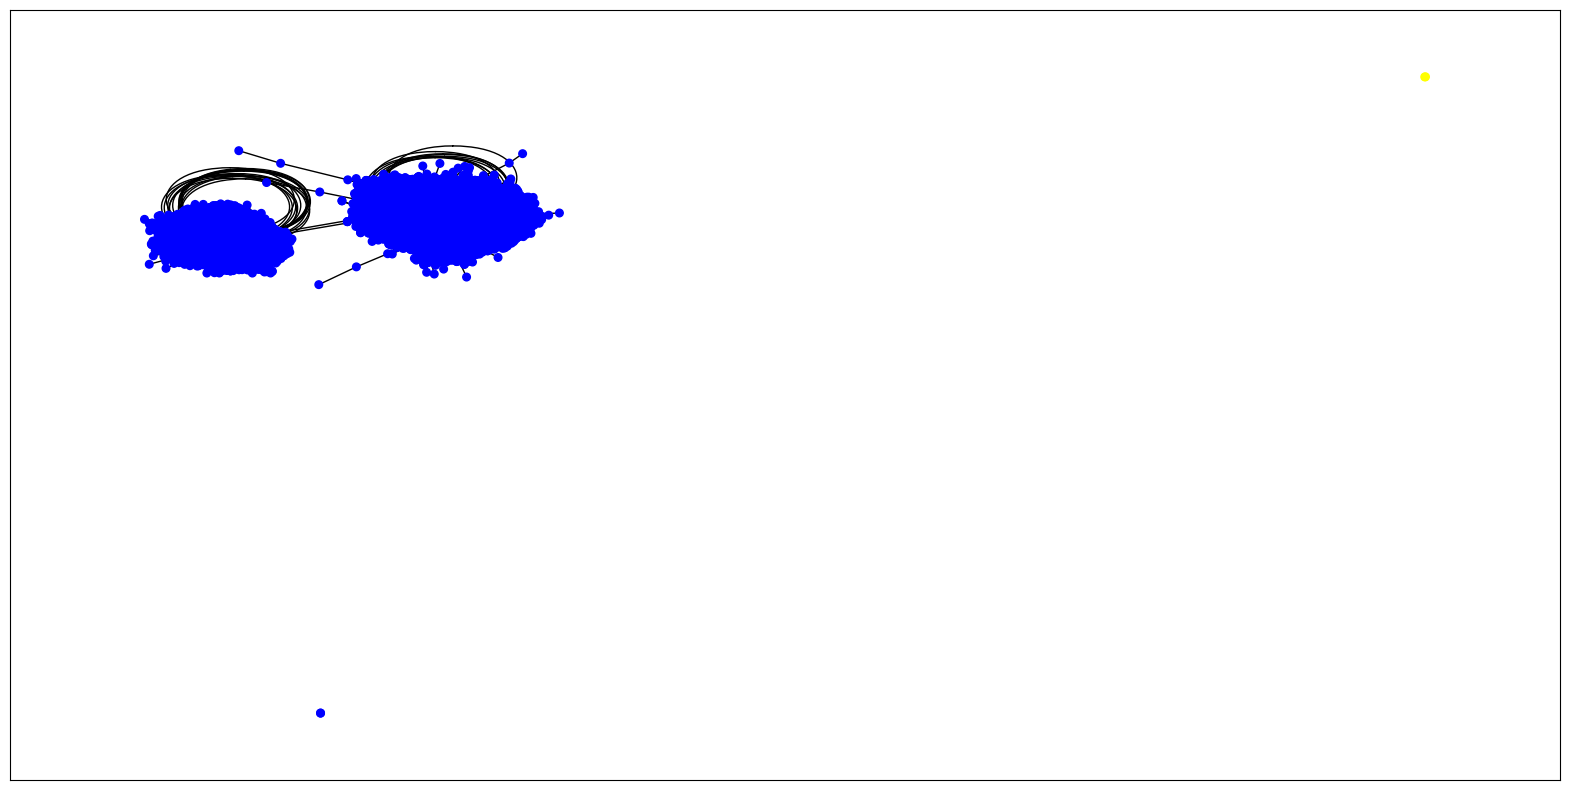

In [40]:
#encontrar la comunidad que contiene un servicio educativo
for c in range(len(louvain_com.communities)):
    if 434449 in louvain_com.communities[c]:
        print(c, louvain_com.communities[c])

#Plotear
##Definir color y tamaño de la comunidad de Beijing
node_color = ['yellow' if v in louvain_com.communities[14] else 'blue' for v in G1.nodes()]
node_size = [1000 if v == 434449 else 30 for v in G1.nodes()]
plt.figure(figsize=(20,10))
nx.draw_networkx(G1, with_labels=False, node_color=node_color, node_size=node_size)
plt.show()

# Cargar Archivos y labels 2021 y 2022

In [18]:
df_2021 = pd.read_csv('data/traslados_2021_tp2_3_lima.csv')
df_2021

,COD_MOD,COD_MOD_DESTINO,WEIGHT
0,526707,415984,1
1,469411,415984,1
2,1500313,412676,1
3,1469576,906412,1
4,1038736,906412,1
...,...,...,...
121817,336297,1772821,1
121818,1583327,1772821,1
121819,322925,1772821,1
121820,703769,1773175,2


In [19]:
df_2022 = pd.read_csv('data/traslados_2022_tp2_3_lima.csv')
df_2022

,COD_MOD,COD_MOD_DESTINO,WEIGHT
0,1072685,415968,1
1,434233,415968,1
2,588830,416008,3
3,524264,492496,1
4,434175,492496,1
...,...,...,...
235785,1761618,1342708,1
235786,901363,1342708,1
235787,607556,1342708,1
235788,1311745,1342708,1


# Crear grafos 2021 y 2022

In [20]:
G2 = nx.Graph()

for i in range(df_2021.shape[0]):
    f = df_2021.iloc[i,:].values
    f = f[~pd.isnull(f)]
    G2.add_edge(f[0], f[1], weight=f[2])

for i in range(df_2022.shape[0]):
    f = df_2022.iloc[i,:].values
    f = f[~pd.isnull(f)]
    G2.add_edge(f[0], f[1], weight=f[2])

In [22]:
print('Cantidad de Colegios:',len(G2.nodes()))
print('Cantidad de Conexiones:',len(G2.edges()))

Cantidad de Colegios: 28206
Cantidad de Conexiones: 304084


In [23]:
#dic_colegios = {}
#colegios_existentes = 0
#colegios_no_existentes = 0
for i in range(df_labels.shape[0]):
    f = df_labels.iloc[i,:].values
    f = f[~pd.isnull(f)]
    if G2.has_node(f[0]):
        #if(f[3] == 'LIMA'):
        G2.add_node(f[0], departamento=f[2], provincia=f[3], distrito=f[4], region=f[5], ugel=f[6], gestion=f[7], modalidad=f[8], label=f[9], nombre=f[9], lon=f[10], lat=f[11])
        #else:
        #G1.remove_node(f[0])
        #print('0:', f[0],'1:', f[1],'2:', f[2],'3:', f[3],'4:', f[4],'5:', f[5],'6:', f[6],'7:', f[7],'8:', f[8],'9:', f[9],'10:', f[10])
        #colegios_existentes += 1
    #else:
    #colegios_no_existentes += 1
    #print(f)
    #G1.add_edge(f[0], f[1], weight=f[2])

#print('cantidad de existentes:', colegios_existentes, ', no existentes:', colegios_no_existentes)

# MODULARIDAD CDLIB

In [27]:
#louvain_com = algorithms.louvain(nx.Graph(incoming_graph_data=G1)) #Lo pasamos a un grafo no dirigido
louvain_com_2 = algorithms.louvain(G2)
print(louvain_com_2)

In [28]:
print('La cantidad de comunidades es {}'.format(len(louvain_com_2.communities)))
#En un grafo dirigido comunidades sale 14
#En un grafo no dirigido comunidades sale 15
#for c in louvain_com.communities:
#    print(c)

La cantidad de comunidades es 13


In [29]:
from igraph.summary import summary

#Mostrar la modularidad general
print(louvain_com_2.modularity_density())

#Mostrar la modularidad de cada comunidad:
print(louvain_com_2.internal_edge_density())
print(louvain_com_2.internal_edge_density(summary=False)) #Mostrar desglosado

FitnessResult(min=None, max=None, score=62.8444215792089, std=None)
FitnessResult(min=0.002768469893841487, max=1.0, score=0.27323805239438176, std=0.4187723683312467)
[0.002768469893841487, 0.004155346307420751, 0.0038678750252038245, 0.0046754688065415995, 0.004328394820694195, 0.005213303268863858, 0.006095395475926449, 0.0076519229249163035, 0.013338504603554686, 0.5, 1.0, 1.0, 1.0]


In [ ]:
# exportando grafo
nx.write_graphml(G2, 'out/colegios_2021_2022.graphml')

In [ ]:
# Exportar a Guephi
nx.write_gexf(G2, 'out/colegios_2021_2022.gexf')

In [33]:
#calcular los grados de los nodos
d2 = {}
for x in G2.degree():
    d2[x[0]] = x[1]
print(d2)


{526707: 45, 415984: 6, 469411: 179, 1500313: 67, 412676: 1, 1469576: 20, 906412: 6, 1038736: 9, 1354380: 25, 764555: 133, 1099175: 69, 1083500: 49, 728261: 55, 825752: 240, 1663673: 43, 325787: 111, 1070275: 220, 339150: 258, 665174: 66, 1667765: 51, 1261742: 119, 325803: 98, 1235787: 34, 1489749: 16, 331140: 13, 1198969: 137, 331991: 82, 1198845: 30, 1758283: 205, 833186: 82, 433722: 170, 1009935: 103, 833459: 22, 1739390: 25, 833699: 26, 338707: 112, 318683: 159, 1020718: 23, 1489020: 52, 1490820: 115, 331108: 39, 332346: 66, 331744: 69, 334821: 82, 338301: 146, 762716: 66, 331611: 55, 528380: 162, 331736: 47, 1502160: 101, 320515: 61, 1073618: 64, 1066083: 55, 336370: 198, 318436: 206, 689661: 208, 628966: 37, 779561: 122, 331223: 116, 1066240: 53, 1495423: 143, 1050087: 55, 1306836: 54, 339507: 284, 1463777: 156, 336982: 37, 337030: 26, 337311: 43, 1723378: 154, 578468: 47, 331702: 109, 824904: 32, 1358415: 85, 338012: 180, 325845: 151, 1509751: 165, 828046: 24, 1355478: 25, 82595

In [34]:
#para cada comunidad
for c in louvain_com_2.communities:
    #calcular el servicio educativo de grado máximo
    max = 0
    s_max = 0
    for s in c:  #para cada servicio educativo en la comunidad c
        if max < d2[s]:
            max = d2[s]
            s_max = s
    #imprimir el resultado para la comunidad c
    print(s_max, '\t', max, '\t', c)

1423615 	 330 	 [1463777, 578468, 1509751, 1355478, 343616, 310490, 501700, 583476, 1539931, 1659754, 1242353, 329532, 337279, 329565, 329383, 901413, 1662204, 1671510, 1762723, 323345, 1610484, 1730803, 1056944, 1535392, 325472, 329342, 870980, 647057, 493239, 1034487, 1313832, 1057942, 1309392, 764134, 1307586, 1068238, 535625, 1494640, 1040393, 1640168, 1639921, 1034057, 773879, 694562, 502054, 325597, 584771, 1385517, 1196203, 1755487, 759530, 762104, 869297, 1748185, 1576909, 1272905, 325605, 583021, 493742, 1660877, 1279801, 872572, 1660588, 874321, 1070523, 1534809, 1700970, 1704378, 1034685, 1475532, 1671569, 502435, 874545, 1053669, 500348, 874248, 305664, 1656081, 327650, 481853, 1087238, 501411, 1195874, 1476258, 493841, 325589, 1279728, 872598, 647040, 603878, 1775931, 1040435, 872614, 1477132, 869222, 1641513, 1473511, 874446, 1475300, 1474832, 1790443, 1279009, 1071935, 1662386, 1278761, 884874, 1651397, 1394949, 1578335, 582262, 1433457, 1529692, 1075779, 584714, 1704881

In [ ]:
#Visualizacion de Grafo
viz.plot_network_clusters(G2, louvain_com_2, node_size=50, figsize=(20, 10))
plt.show()

In [ ]:
#vizualizar el grafo según comunidades
pos = nx.spectral_layout(G2)
viz.plot_network_clusters(G2, louvain_com_2, pos, node_size=50, figsize=(20, 10), )
plt.show()

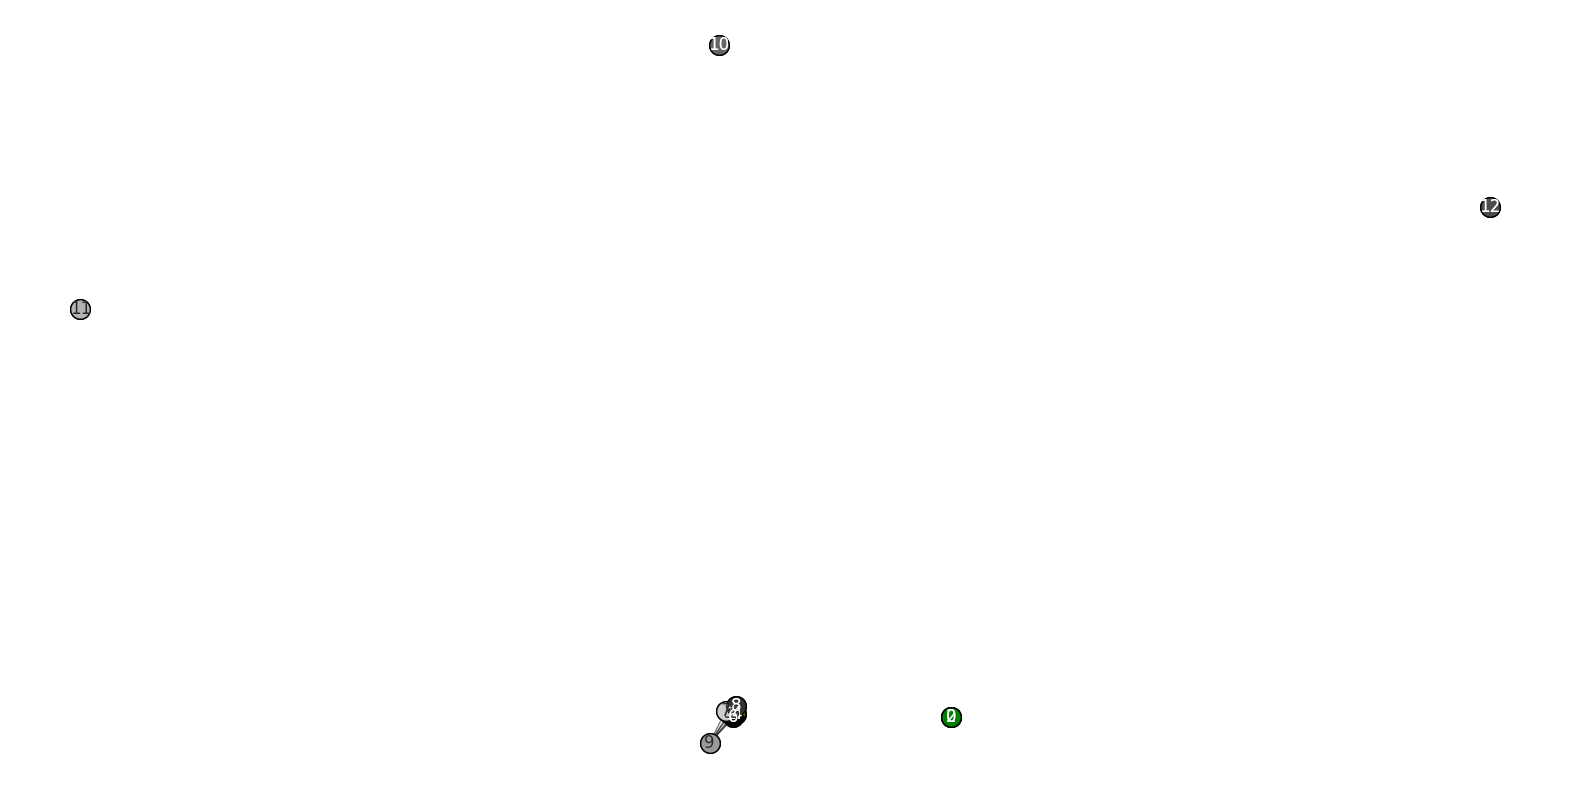

In [36]:
#visualizar el grafo de comunidades
viz.plot_community_graph(G2, louvain_com_2, figsize=(20, 10), plot_labels=True)
plt.show()

0 [1463777, 578468, 1509751, 1355478, 343616, 310490, 501700, 583476, 1539931, 1659754, 1242353, 329532, 337279, 329565, 329383, 901413, 1662204, 1671510, 1762723, 323345, 1610484, 1730803, 1056944, 1535392, 325472, 329342, 870980, 647057, 493239, 1034487, 1313832, 1057942, 1309392, 764134, 1307586, 1068238, 535625, 1494640, 1040393, 1640168, 1639921, 1034057, 773879, 694562, 502054, 325597, 584771, 1385517, 1196203, 1755487, 759530, 762104, 869297, 1748185, 1576909, 1272905, 325605, 583021, 493742, 1660877, 1279801, 872572, 1660588, 874321, 1070523, 1534809, 1700970, 1704378, 1034685, 1475532, 1671569, 502435, 874545, 1053669, 500348, 874248, 305664, 1656081, 327650, 481853, 1087238, 501411, 1195874, 1476258, 493841, 325589, 1279728, 872598, 647040, 603878, 1775931, 1040435, 872614, 1477132, 869222, 1641513, 1473511, 874446, 1475300, 1474832, 1790443, 1279009, 1071935, 1662386, 1278761, 884874, 1651397, 1394949, 1578335, 582262, 1433457, 1529692, 1075779, 584714, 1704881, 1108968, 390

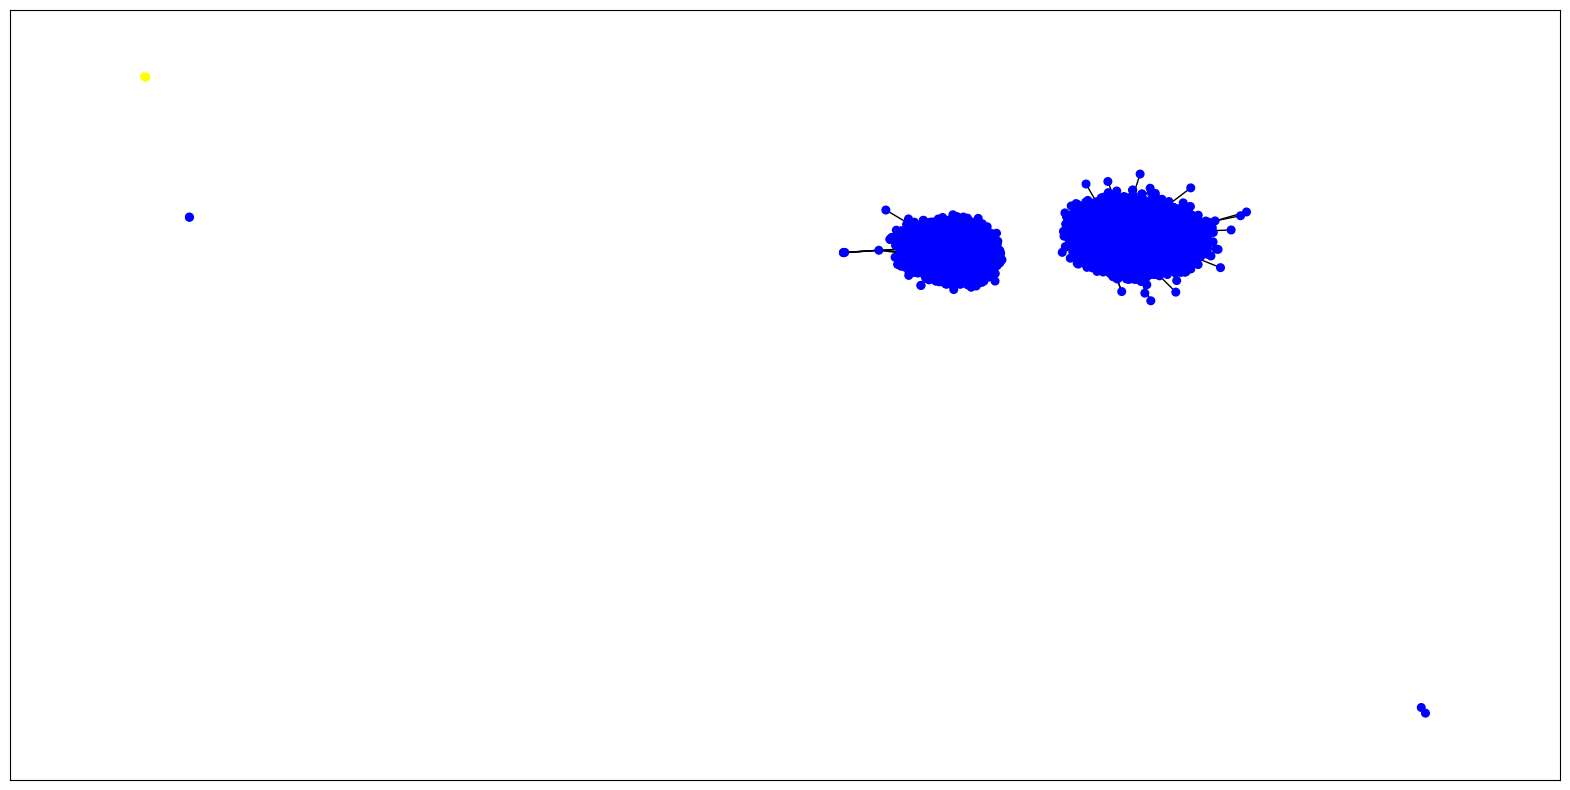

In [38]:
#encontrar la comunidad que contiene un servicio educativo
for c in range(len(louvain_com_2.communities)):
    if 1423615 in louvain_com_2.communities[c]:
        print(c, louvain_com_2.communities[c])

#Plotear
##Definir color y tamaño de la comunidad de Beijing
node_color = ['yellow' if v in louvain_com_2.communities[12] else 'blue' for v in G2.nodes()]
node_size = [1000 if v == 1423615 else 30 for v in G2.nodes()]
plt.figure(figsize=(20, 10))
nx.draw_networkx(G2, with_labels=False, node_color=node_color, node_size=node_size)
plt.show()